In [22]:
%matplotlib inline
#importing libraries 
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
#Read data 
data = pd.read_csv("Titanic_dataset.csv")

## Data Cleaning & Feature Engineering

In [3]:
#explore the data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#get different statistics of the data 
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#have a quick overview of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#check null values in each column to handle them 
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h4> As it can be seen Cabin column values are 75% Null so it will be dropped </h4> 

In [7]:
#removing deplicates
data = data.drop_duplicates()

In [8]:
#Drop the rows where all elements are missing.
data.dropna(how='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:>

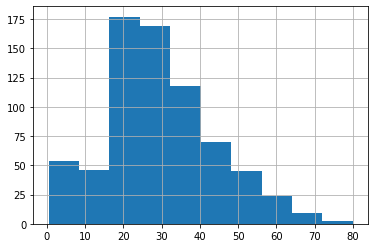

In [9]:
#plot the age column distribution 
data['Age'].hist()

#### It can be seen from the histogram that the age distribution is right skewed hence the missing values will be filled with the median  

In [10]:
#fill the age missing values with the median 
data['Age'] = data['Age'].fillna(data['Age'].median())

In [11]:
# fill the Embarked missing values with U as Unknown 
data['Embarked'] = data['Embarked'].fillna('U')

In [12]:
#check the unique values for each column
print(data.nunique()) 

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         4
dtype: int64


<h4> It can be seen that the PassengerId and Name are considered unique values for each row 
so the title for females will be extracted from the name column then it will be dropped as the PassengerId is enough to distinguish between different entries</h4> 

In [13]:
#Assign a new column for being married or not based on the title for female titles {Miss , Mrs}
data.loc[data.Name.str.contains('Mrs'), 'Married' ] = 1
data.loc[data.Name.str.contains('Miss'), 'Married' ] = 0

In [14]:
#Drop name , Cabin columns 
data.drop(['Cabin' , 'Name'],axis='columns',inplace=True)

#### To make things simpler a column for age range will be added to group the passengers into different age groups

In [15]:
# adding a column for age range
data.loc[(0 <= data['Age']) & (data['Age'] <= 18), 'age_range' ] = "Age Range(0-18 years)"
data.loc[( 19<= data['Age']) & (data['Age'] <= 40), 'age_range' ] = "Age Range(19-40 years)"
data.loc[(41 <= data['Age']) & (data['Age'] <= 60), 'age_range' ] = "Age Range(41-60 years)"
data.loc[(data['Age'] >= 61), 'age_range'] = "Age Range(60+ years)"

## Exploratory Data Analysis

### Question 1: What is the surviving rate in terms of gender and class?

Text(0.5, 1.05, 'Survivng Rate in Terms of Gender and Class')

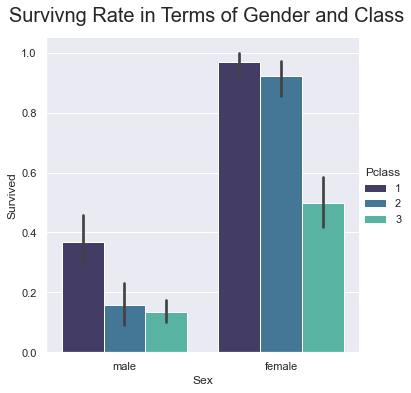

In [16]:
#plotting surviving rate in terms of gender and class
sns.set(rc = {'figure.figsize':(20,10)})
gender_class_plot = sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=data , palette="mako")
gender_class_plot.fig.suptitle("Survivng Rate in Terms of Gender and Class", va = 'top', fontsize=20 , y=1.05 )

### Question 2: Were married women more likely to survive than unmarried women?

Text(0.5, 1.05, 'Married Vs Unmarried Surviving Rate ')

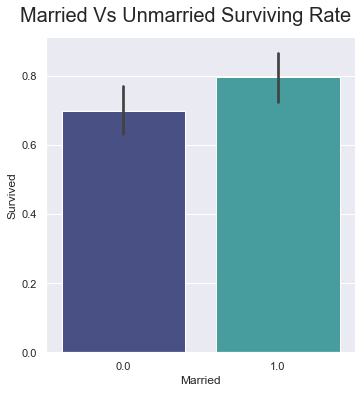

In [17]:
#plotting married vs unmarried women surviving rate 
sns.set(rc = {'figure.figsize':(13,6)})
married_data = data.loc[data['Sex'] == 'female']
married_plot = sns.catplot(x="Married", y="Survived", kind="bar",  palette="mako" , data=married_data)
married_plot.fig.suptitle("Married Vs Unmarried Surviving Rate ", va = 'top', fontsize=20 , y=1.05 )


### Question 3: Which age group were the highest in each passenger class ?

Text(0.5, 1.0, ' Age Distribution in Passengers Classes')

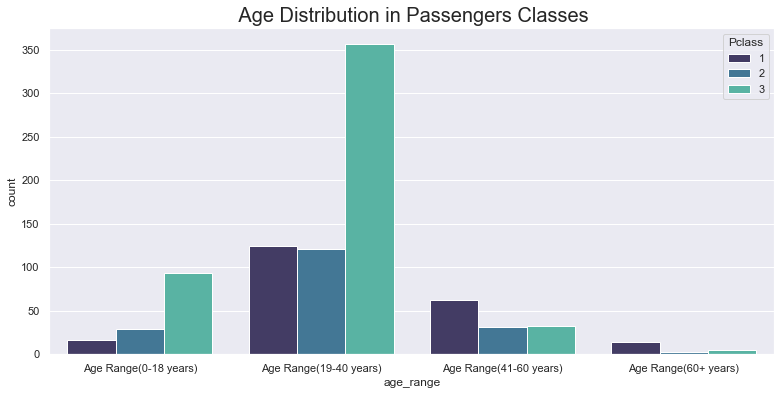

In [18]:
#plotting the age range in regards to the passenger class
sns.set(rc = {'figure.figsize':(13,6)})
class_age_plot =sns.countplot(x="age_range", hue ="Pclass" , data=data , palette="mako", order = ['Age Range(0-18 years)','Age Range(19-40 years)' ,'Age Range(41-60 years)' , 'Age Range(60+ years)'] )
class_age_plot.set_title(' Age Distribution in Passengers Classes' , fontsize=20)

### Question 4: What is the surviving rate in each age group ?

Text(0.5, 1.0, 'Survivng Rate in Different Age Groups')

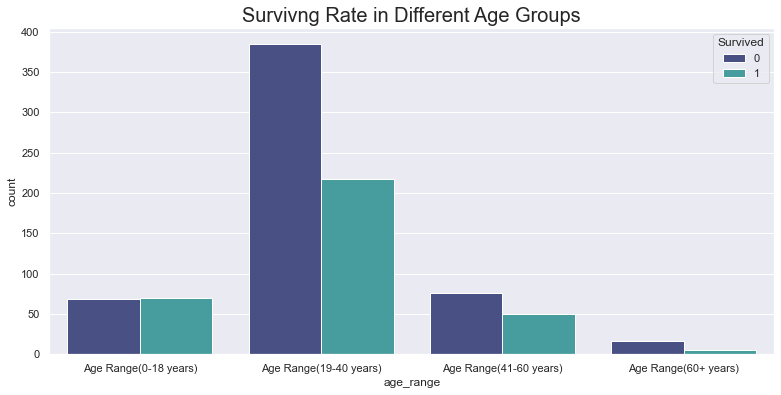

In [19]:
#plotting the surviving rate in terms of the age group
sns.set(rc = {'figure.figsize':(13,6)})
surviving_age_plot =sns.countplot(x="age_range", hue ="Survived" , data=data , palette="mako" ,
order = ['Age Range(0-18 years)','Age Range(19-40 years)' ,'Age Range(41-60 years)' , 'Age Range(60+ years)'])
surviving_age_plot.set_title('Survivng Rate in Different Age Groups' , fontsize=20)


### Question 5: Is there a correlation between the surviving rate and the number of relatives for each passenger?

In [20]:
#Creating a new column to count the whole relatives for each passenger 
data['relatives'] = data['SibSp'] + data['Parch']

Text(0.5, 1.0, 'Correlation Between the Surviving Rate and Number of Relatives')

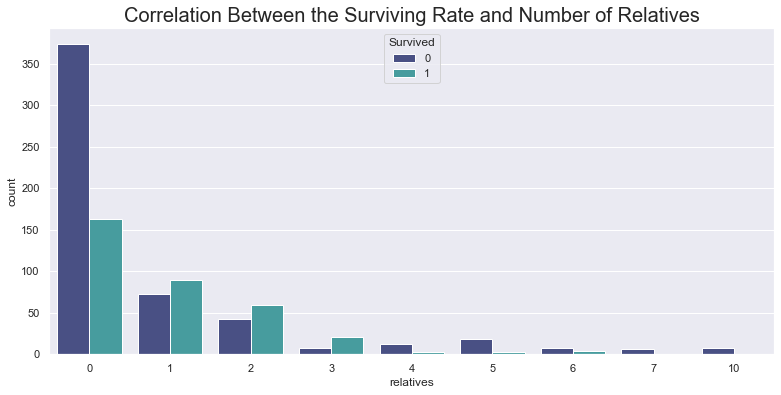

In [21]:
#plotting surviving rate and the number of relatives 
relatives_plot = sns.countplot(x="relatives", hue="Survived",  palette="mako" , data=data)
relatives_plot.set_title('Correlation Between the Surviving Rate and Number of Relatives' , fontsize=20)

References: <br>
https://seaborn.pydata.org <br>
https://pandas.pydata.org/docs/ <br>
data Acquired from <br> https://www.kaggle.com/c/titanic